# **1. Memuat Dataset**

In [24]:
# Import Dataset New York City
import pandas as pd
nyc_data = pd.read_csv('/content/dataset_TSMC2014_NYC.csv')
nyc_data.head()

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012


In [25]:
# Import Dataset Tokyo
tokyo_data = pd.read_csv('/content/dataset_TSMC2014_TKY.csv')
tokyo_data.head()

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp
0,1541,4f0fd5a8e4b03856eeb6c8cb,4bf58dd8d48988d10c951735,Cosmetics Shop,35.705101,139.619590,540,Tue Apr 03 18:17:18 +0000 2012
1,868,4b7b884ff964a5207d662fe3,4bf58dd8d48988d1d1941735,Ramen / Noodle House,35.715581,139.800317,540,Tue Apr 03 18:22:04 +0000 2012
2,114,4c16fdda96040f477cc473a5,4d954b0ea243a5684a65b473,Convenience Store,35.714542,139.480065,540,Tue Apr 03 19:12:07 +0000 2012
3,868,4c178638c2dfc928651ea869,4bf58dd8d48988d118951735,Food & Drink Shop,35.725592,139.776633,540,Tue Apr 03 19:12:13 +0000 2012
4,1458,4f568309e4b071452e447afe,4f2a210c4b9023bd5841ed28,Housing Development,35.656083,139.734046,540,Tue Apr 03 19:18:23 +0000 2012


# **2. Filter Kategori Tempat Relevan**

In [26]:
# Memilih kategori relevan
relax_categories = ['Park', 'Coffee Shop', 'Bar', 'Mall', 'Restaurant', 'Café']

# Hapus nilai NaN di kolom venueCategory
nyc_data = nyc_data.dropna(subset=['venueCategory'])
tokyo_data = tokyo_data.dropna(subset=['venueCategory'])

# Filter berdasarkan kategori
nyc_filtered = nyc_data[nyc_data['venueCategory'].isin(relax_categories)]
tokyo_filtered = tokyo_data[tokyo_data['venueCategory'].isin(relax_categories)]

# Tampilkan hasil
print("NYC Filtered:")
print(nyc_filtered.head())

print("Tokyo Filtered:")
print(tokyo_filtered.head())

NYC Filtered:
    userId                   venueId           venueCategoryId venueCategory  \
6      642  4ab966c3f964a5203c7f20e3  4bf58dd8d48988d1e0931735   Coffee Shop   
14     931  49f85763f964a520f16c1fe3  4bf58dd8d48988d16d941735          Café   
17     135  4a689777f964a520a0ca1fe3  4bf58dd8d48988d1c4941735    Restaurant   
18     895  4bb7e0c41261d13a8707e898  4bf58dd8d48988d1e0931735   Coffee Shop   
21     284  4abe60d8f964a520198d20e3  4bf58dd8d48988d1e0931735   Coffee Shop   

     latitude  longitude  timezoneOffset                    utcTimestamp  
6   40.751591 -73.974121            -240  Tue Apr 03 18:04:38 +0000 2012  
14  40.704588 -74.009639            -240  Tue Apr 03 18:09:59 +0000 2012  
17  40.755275 -73.978806            -240  Tue Apr 03 18:11:04 +0000 2012  
18  40.906627 -73.777774            -240  Tue Apr 03 18:11:16 +0000 2012  
21  40.742816 -74.000406            -240  Tue Apr 03 18:12:27 +0000 2012  
Tokyo Filtered:
    userId                   venueId   

# **3. Menghapus Kolom yang Tidak Diperlukan**

In [27]:
# Pilih kolom yang dibutuhkan
nyc_selected_columns = nyc_filtered[['userId', 'venueCategory', 'utcTimestamp', 'latitude', 'longitude']]

# Tambahkan kolom City
nyc_selected_columns['city'] = 'New York'

# Tampilkan hasil dataset New York
print("Dataset New York:")
print(nyc_selected_columns.head())

Dataset New York:
    userId venueCategory                    utcTimestamp   latitude  \
6      642   Coffee Shop  Tue Apr 03 18:04:38 +0000 2012  40.751591   
14     931          Café  Tue Apr 03 18:09:59 +0000 2012  40.704588   
17     135    Restaurant  Tue Apr 03 18:11:04 +0000 2012  40.755275   
18     895   Coffee Shop  Tue Apr 03 18:11:16 +0000 2012  40.906627   
21     284   Coffee Shop  Tue Apr 03 18:12:27 +0000 2012  40.742816   

    longitude      city  
6  -73.974121  New York  
14 -74.009639  New York  
17 -73.978806  New York  
18 -73.777774  New York  
21 -74.000406  New York  


<ipython-input-27-dfdb3f3726ed>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_selected_columns['city'] = 'New York'


In [28]:
# Pilih kolom yang dibutuhkan
tokyo_selected_columns = tokyo_filtered[['userId', 'venueCategory', 'utcTimestamp', 'latitude', 'longitude']]

# Tambahkan kolom City
tokyo_selected_columns['city'] = 'Tokyo'

# Tampilkan hasil dataset Tokyo
print("Dataset Tokyo:")
print(tokyo_selected_columns.head())

Dataset Tokyo:
    userId venueCategory                    utcTimestamp   latitude  \
33    2290          Park  Tue Apr 03 21:03:45 +0000 2012  35.745763   
42    1895          Park  Tue Apr 03 21:27:25 +0000 2012  35.616672   
62    2243    Restaurant  Tue Apr 03 21:50:15 +0000 2012  35.627214   
72       9          Café  Tue Apr 03 21:54:28 +0000 2012  35.563375   
81    1965          Park  Tue Apr 03 21:59:06 +0000 2012  35.690694   

     longitude   city  
33  139.744377  Tokyo  
42  139.639058  Tokyo  
62  139.714322  Tokyo  
72  139.715023  Tokyo  
81  139.711493  Tokyo  


<ipython-input-28-6b4c9fe4238b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tokyo_selected_columns['city'] = 'Tokyo'


# **4. Menambahkan Kolom Waktu Check-In**

In [29]:
nyc_selected_columns['utcTimestamp'] = pd.to_datetime(nyc_selected_columns['utcTimestamp'])
tokyo_selected_columns['utcTimestamp'] = pd.to_datetime(tokyo_filtered['utcTimestamp'])

nyc_selected_columns['hour'] = nyc_selected_columns['utcTimestamp'].dt.hour
tokyo_selected_columns['hour'] = tokyo_selected_columns['utcTimestamp'].dt.hour

<ipython-input-29-d1142450dd79>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nyc_selected_columns['utcTimestamp'] = pd.to_datetime(nyc_selected_columns['utcTimestamp'])
<ipython-input-29-d1142450dd79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_selected_columns['utcTimestamp'] = pd.to_datetime(nyc_selected_columns['utcTimestamp'])
<ipython-input-29-d1142450dd79>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tokyo_selected_columns['utcTimestamp'] = pd.to_da

# **5. Menghapus Outlier**

In [30]:
# Range latitude dan longitude untuk masing-masing kota
nyc_lat_range = (40.5, 41.0)
nyc_lon_range = (-74.3, -73.7)

tokyo_lat_range = (35.5, 35.9)
tokyo_lon_range = (139.5, 140.0)

# Menghapus outlier pada dataset New York
nyc_selected_columns = nyc_selected_columns[
    (nyc_selected_columns['latitude'].between(nyc_lat_range[0], nyc_lat_range[1])) &
    (nyc_selected_columns['longitude'].between(nyc_lon_range[0], nyc_lon_range[1]))
]

# Menghapus outlier pada dataset Tokyo
tokyo_selected_columns = tokyo_selected_columns[
    (tokyo_selected_columns['latitude'].between(tokyo_lat_range[0], tokyo_lat_range[1])) &
    (tokyo_selected_columns['longitude'].between(tokyo_lon_range[0], tokyo_lon_range[1]))
]

# Tampilkan hasil setelah menghapus outlier
print("Dataset New York setelah menghapus outlier:")
print(nyc_selected_columns.head())

print("Dataset Tokyo setelah menghapus outlier:")
print(tokyo_selected_columns.head())

Dataset New York setelah menghapus outlier:
    userId venueCategory              utcTimestamp   latitude  longitude  \
6      642   Coffee Shop 2012-04-03 18:04:38+00:00  40.751591 -73.974121   
14     931          Café 2012-04-03 18:09:59+00:00  40.704588 -74.009639   
17     135    Restaurant 2012-04-03 18:11:04+00:00  40.755275 -73.978806   
18     895   Coffee Shop 2012-04-03 18:11:16+00:00  40.906627 -73.777774   
21     284   Coffee Shop 2012-04-03 18:12:27+00:00  40.742816 -74.000406   

        city  hour  
6   New York    18  
14  New York    18  
17  New York    18  
18  New York    18  
21  New York    18  
Dataset Tokyo setelah menghapus outlier:
    userId venueCategory              utcTimestamp   latitude   longitude  \
33    2290          Park 2012-04-03 21:03:45+00:00  35.745763  139.744377   
42    1895          Park 2012-04-03 21:27:25+00:00  35.616672  139.639058   
62    2243    Restaurant 2012-04-03 21:50:15+00:00  35.627214  139.714322   
72       9          Café

# **Pertanyaan**

### **1. Apakah kategori tempat yang paling sering dikunjungi di Tokyo dan NYC mencerminkan perbedaan budaya dalam kebiasaan sosial dan gaya hidup?**

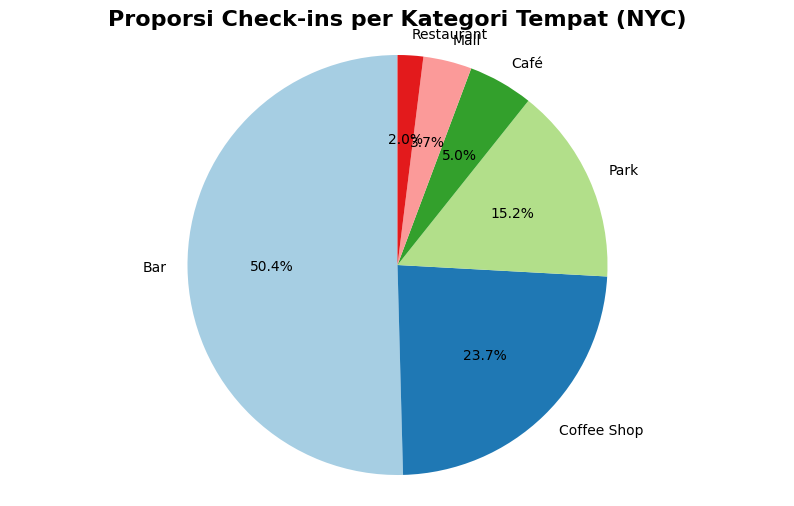

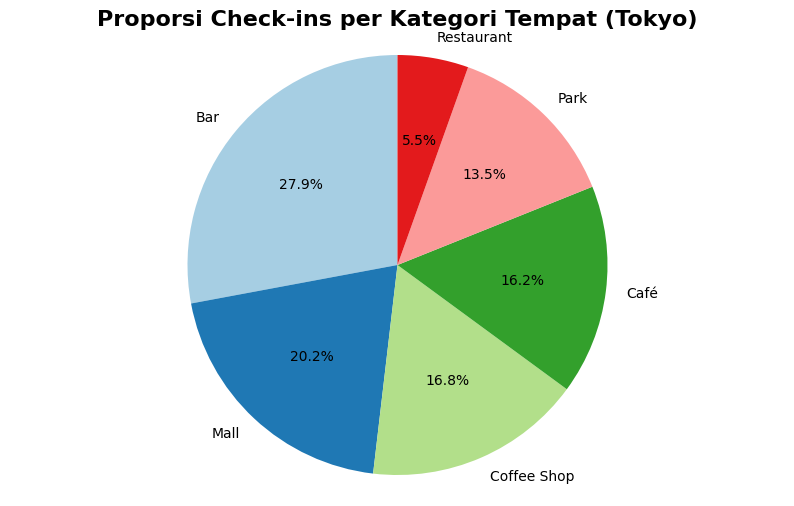

In [31]:
import matplotlib.pyplot as plt

nyc_category_counts = nyc_selected_columns['venueCategory'].value_counts(6)
tokyo_category_counts = tokyo_selected_columns['venueCategory'].value_counts(6)

# Membuat Pie Chart untuk NYC
plt.figure(figsize=(10, 6))
plt.pie(nyc_category_counts, labels=nyc_category_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Proporsi Check-ins per Kategori Tempat (NYC)', fontsize=16, fontweight='bold')
plt.axis('equal')  # Membuat pie chart berbentuk lingkaran sempurna
plt.show()

# Membuat Pie Chart untuk Tokyo
plt.figure(figsize=(10, 6))
plt.pie(tokyo_category_counts, labels=tokyo_category_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Proporsi Check-ins per Kategori Tempat (Tokyo)', fontsize=16, fontweight='bold')
plt.axis('equal')  # Membuat pie chart berbentuk lingkaran sempurna
plt.show()


### **2. Bagaimana jumlah check-in di masing-masing kategori tempat di NYC dan Tokyo pada waktu tertentu?**

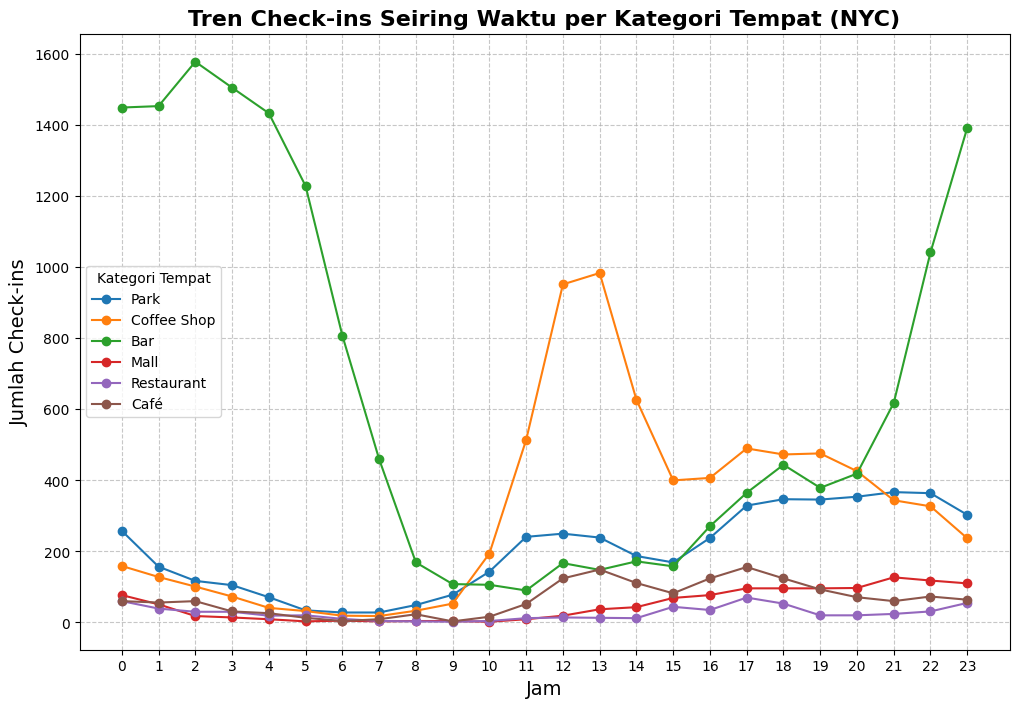

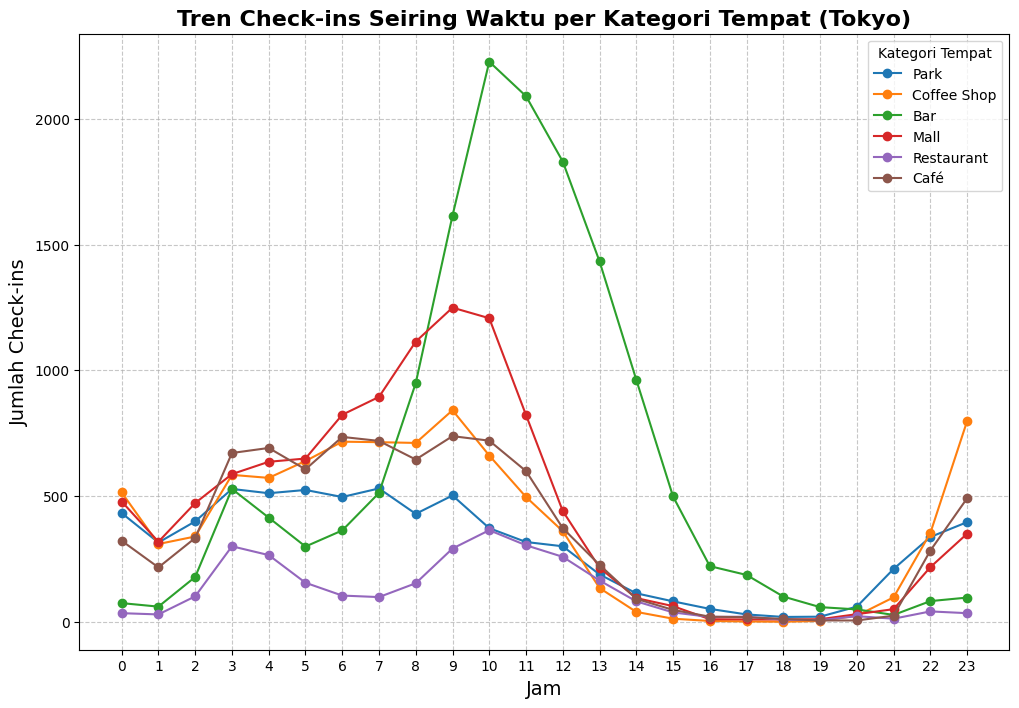

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Menghitung jumlah check-in per jam untuk setiap kategori tempat di NYC
nyc_checkins_per_hour = nyc_selected_columns.groupby(['hour', 'venueCategory']).size().unstack(fill_value=0)

# Menghitung jumlah check-in per jam untuk setiap kategori tempat di Tokyo
tokyo_checkins_per_hour = tokyo_selected_columns.groupby(['hour', 'venueCategory']).size().unstack(fill_value=0)

# Membuat plot untuk NYC
plt.figure(figsize=(12, 8))
for category in relax_categories:
    plt.plot(nyc_checkins_per_hour.index, nyc_checkins_per_hour[category], label=category, marker='o')
plt.title('Tren Check-ins Seiring Waktu per Kategori Tempat (NYC)', fontsize=16, fontweight='bold')
plt.xlabel('Jam', fontsize=14)
plt.ylabel('Jumlah Check-ins', fontsize=14)
plt.xticks(range(24))  # Menampilkan semua jam dari 0 hingga 23
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Kategori Tempat', fontsize=10)
plt.show()

# Membuat plot untuk Tokyo
plt.figure(figsize=(12, 8))
for category in relax_categories:
    plt.plot(tokyo_checkins_per_hour.index, tokyo_checkins_per_hour[category], label=category, marker='o')
plt.title('Tren Check-ins Seiring Waktu per Kategori Tempat (Tokyo)', fontsize=16, fontweight='bold')
plt.xlabel('Jam', fontsize=14)
plt.ylabel('Jumlah Check-ins', fontsize=14)
plt.xticks(range(24))  # Menampilkan semua jam dari 0 hingga 23
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Kategori Tempat', fontsize=10)
plt.show()


 ### **3. Bagaimana distribusi frekuensinya pada salah satu kategori?**

<ipython-input-33-5f28cca916ec>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nyc_selected_columns = nyc_filtered[nyc_data['venueCategory'] == category]
<ipython-input-33-5f28cca916ec>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tokyo_selected_columns = tokyo_filtered[tokyo_data['venueCategory'] == category]


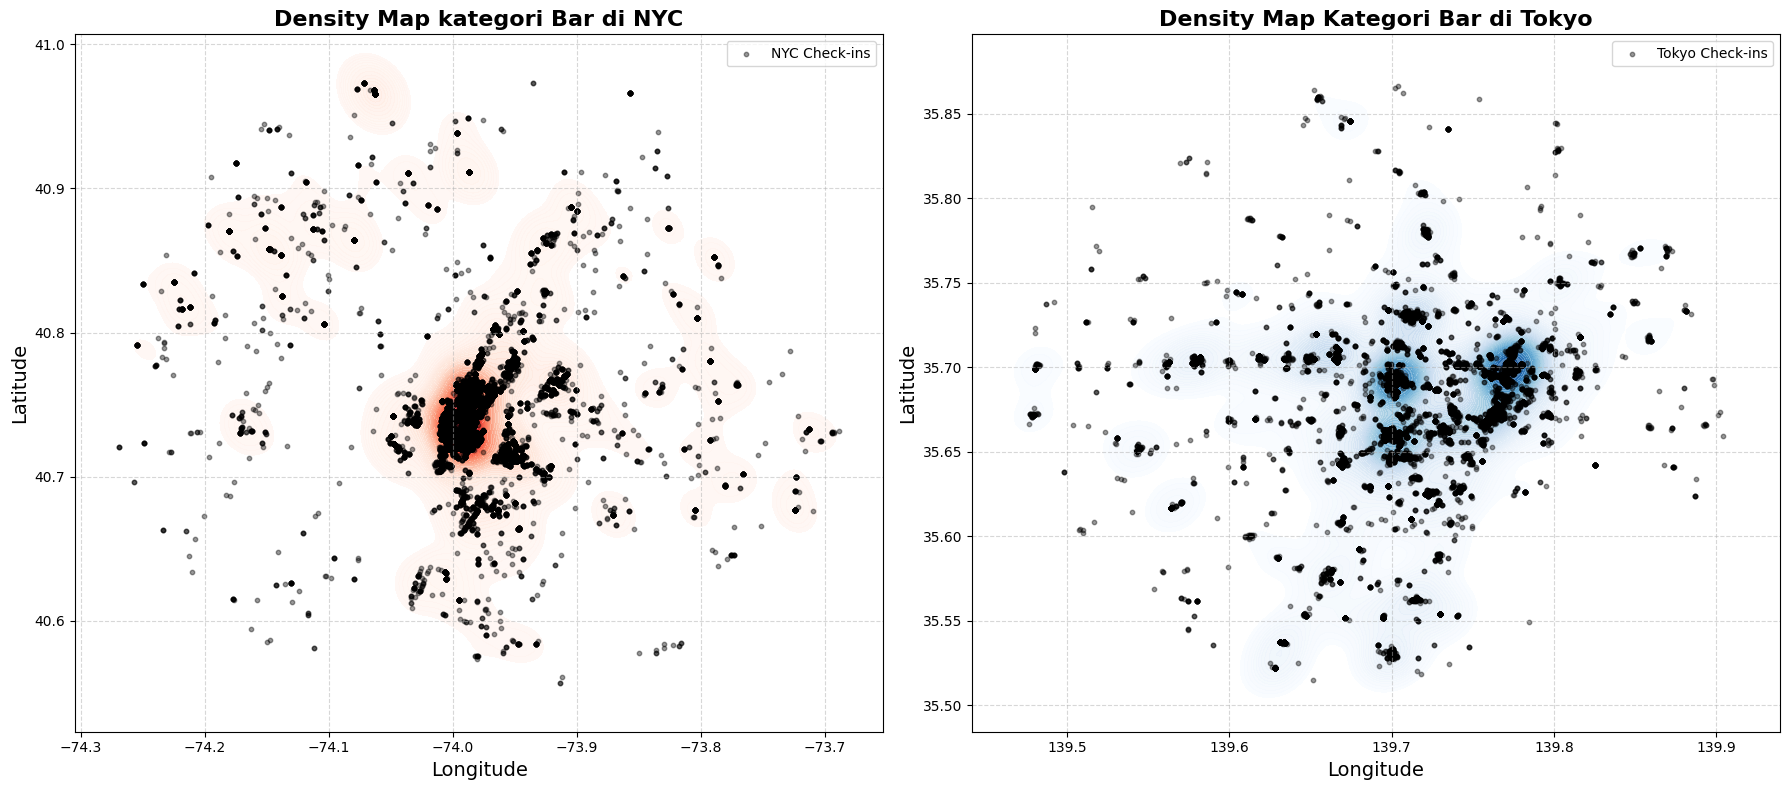

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

category = 'Bar'


# Data NYC
nyc_selected_columns = nyc_filtered[nyc_data['venueCategory'] == category]
longitude_nyc = nyc_selected_columns['longitude']
latitude_nyc = nyc_selected_columns['latitude']


# Data Tokyo
tokyo_selected_columns = tokyo_filtered[tokyo_data['venueCategory'] == category]
longitude_tokyo = tokyo_selected_columns['longitude']
latitude_tokyo = tokyo_selected_columns['latitude']


fig, axes = plt.subplots(1, 2, figsize=(18, 8))


# Density plot NYC
sns.kdeplot(
    x=longitude_nyc, y=latitude_nyc,
    cmap='Reds',
    fill=True,
    alpha=0.7,
    levels=50,
    ax=axes[0]
)
axes[0].scatter(longitude_nyc, latitude_nyc, s=10, alpha=0.4, color='black', label='NYC Check-ins')
axes[0].set_title(f'Density Map kategori {category} di NYC', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Longitude', fontsize=14)
axes[0].set_ylabel('Latitude', fontsize=14)
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.5)


# Density plot Tokyo
sns.kdeplot(
    x=longitude_tokyo, y=latitude_tokyo,
    cmap='Blues',
    fill=True,
    alpha=0.7,
    levels=50,
    ax=axes[1]
)
axes[1].scatter(longitude_tokyo, latitude_tokyo, s=10, alpha=0.4, color='black', label='Tokyo Check-ins')
axes[1].set_title(f'Density Map Kategori {category} di Tokyo', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Longitude', fontsize=14)
axes[1].set_ylabel('Latitude', fontsize=14)
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()